In [3]:
# 패키지 불러오기
import pandas as pd # 데이터 처리
import numpy as np #연산
import matplotlib #시각화
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # 데이터 분할 : train, test
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_percentage_error
from datetime import datetime
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import Logit


from imblearn.over_sampling import SMOTE
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 분류 SVM
from sklearn.svm import SVC

# 분류모델 평가 함수
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import  classification_report

from scipy.stats import mannwhitneyu

from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from collections import Counter

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')
path='/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop=fm.FontProperties(fname=path, size=18).get_name()
matplotlib.rc('font',family = fontprop)
matplotlib.rc('axes', unicode_minus = False)

my_palette = ['#'+hex for hex in "9b5de5 f15bb5 fee440 00bbf9 00f5d4".split(' ')]
my_palette = sns.set_palette(my_palette)

- 데이터 불러오기

In [705]:
df1 = pd.read_csv("분석기초/01_sales_data2.csv")
df2 = pd.read_csv("분석기초/02_customer_data.csv")
df3 = pd.read_csv("분석기초/03_stock_data.csv")

In [706]:
df1.head()

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5


- 데이터 결측치 확인

In [707]:
df1.isnull().sum()

invoice         0
product_code    0
product_name    0
quantity        0
date            0
unit_price      0
customer_id     0
sales           0
dtype: int64

In [708]:
df2.isnull().sum()

customer_id      0
city             0
state            0
pop_thousand     0
land_sq_meter    0
pop_size         0
city_type        0
city_lctn        0
dtype: int64

In [709]:
df3.isnull().sum()

product_name    0
stock_type      0
dtype: int64

<AxesSubplot:>

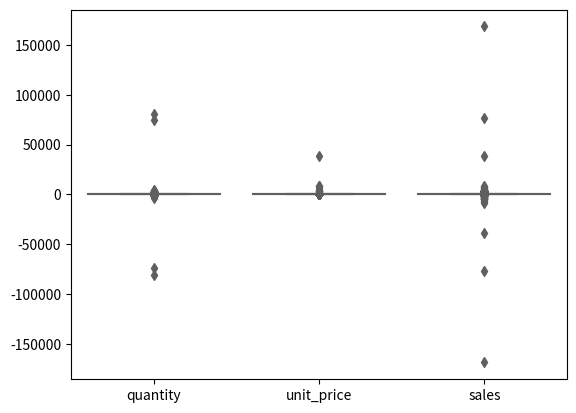

In [710]:
sns.boxplot(data = df1)

In [711]:
q3 = df1.quantile(0.75) # df['국어'].quantile(0.75) 처럼 특정 열만 적용 가능
q1 = df1.quantile(0.25)

iqr = q3 - q1

In [712]:
def is_outlier(df, str):
    kor_score = df[str]
    if kor_score > q3[str] + 1.5 * iqr[str] or kor_score < q1[str] - 1.5 * iqr[str]:
        return True
    else:
        return False

In [713]:
# df1['양_이상치여부'] = df1.apply(is_outlier, axis = 1)

In [714]:
df1[df1['quantity'] < 0]

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
68,C540006,21306,SET/4 DAISY MIRROR MAGNETS,-1,2021-01-04,2.10,E14606,-2.10
69,C540006,84352,SILVER CHRISTMAS TREE BAUBLE STAND,-1,2021-01-04,16.95,E14606,-16.95
70,C540006,22423,REGENCY CAKESTAND 3 TIER,-1,2021-01-04,12.75,E14606,-12.75
71,C540007,21055,TOOL BOX SOFT TOY,-6,2021-01-04,8.95,E15379,-53.70
72,C540007,22274,FELTCRAFT DOLL EMILY,-6,2021-01-04,2.95,E15379,-17.70
...,...,...,...,...,...,...,...,...
258312,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2021-12-09,0.83,E14397,-9.13
258360,C581499,M,Manual,-1,2021-12-09,224.69,E15498,-224.69
258527,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2021-12-09,10.95,E15311,-54.75
258528,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2021-12-09,1.25,E17315,-1.25


In [715]:
df1.describe()

,quantity,unit_price,sales
count,282642.000000,282642.000000,282642.000000
mean,11.701580,3.324527,19.634593
std,295.643508,79.572114,510.341936
min,-80995.000000,0.000000,-168469.600000
25%,2.000000,1.250000,4.250000
50%,5.000000,1.950000,10.500000
75%,12.000000,3.750000,17.850000
max,80995.000000,38970.000000,168469.600000


<AxesSubplot:>

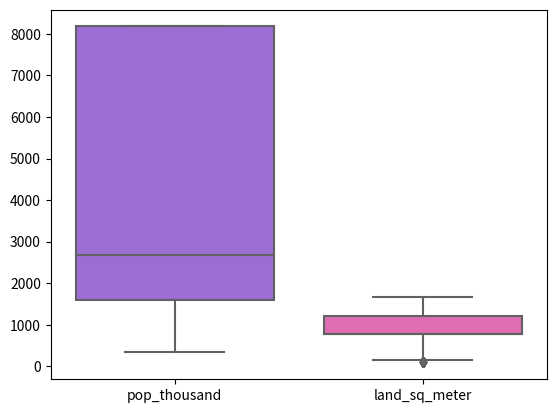

In [716]:
sns.boxplot(data = df2)

In [717]:
result = pd.merge(df1,df3,on=['product_name'])

In [718]:
result['product_name']

0                    JUMBO BAG PINK POLKADOT
1                    JUMBO BAG PINK POLKADOT
2                    JUMBO BAG PINK POLKADOT
3                    JUMBO BAG PINK POLKADOT
4                    JUMBO BAG PINK POLKADOT
                         ...                
282637    CREAM HANGING HEART T-LIGHT HOLDER
282638          BLACK SIL'T SQU CANDLE PLATE
282639       VINTAGE ZINC WATERING CAN SMALL
282640           PAPER CRAFT , LITTLE BIRDIE
282641           PAPER CRAFT , LITTLE BIRDIE
Name: product_name, Length: 282642, dtype: object

In [719]:
result.query("quantity < 0").tail()

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,stock_type
282302,C579913,71477,COLOURED GLASS STAR T-LIGHT HOLDER,-1,2021-12-01,3.95,E14626,-3.95,consignment
282303,C579935,71477,COLOURED GLASS STAR T-LIGHT HOLDER,-6,2021-12-01,3.95,E14188,-23.70,consignment
282305,C580641,71477,COLOURED GLASS STAR T-LIGHT HOLDER,-14,2021-12-05,3.95,E15621,-55.30,consignment
282321,C581464,71477,COLOURED GLASS STAR T-LIGHT HOLDER,-6,2021-12-08,3.95,E15951,-23.70,consignment
282641,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2021-12-09,2.08,E16446,-168469.60,consignment


In [720]:
result.query("quantity < 0")

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,stock_type
9,C540417,22386,JUMBO BAG PINK POLKADOT,-20,2021-01-07,1.95,E13680,-39.00,consignment
166,C548972,22386,JUMBO BAG PINK POLKADOT,-10,2021-04-05,1.95,E15674,-19.50,consignment
286,C555272,22386,JUMBO BAG PINK POLKADOT,-10,2021-06-01,2.08,E16496,-20.80,consignment
355,C558444,22386,JUMBO BAG PINK POLKADOT,-1,2021-06-29,1.79,E15311,-1.79,consignment
634,C570203,22386,JUMBO BAG PINK POLKADOT,-2,2021-10-07,1.79,E15311,-3.58,consignment
...,...,...,...,...,...,...,...,...,...
282302,C579913,71477,COLOURED GLASS STAR T-LIGHT HOLDER,-1,2021-12-01,3.95,E14626,-3.95,consignment
282303,C579935,71477,COLOURED GLASS STAR T-LIGHT HOLDER,-6,2021-12-01,3.95,E14188,-23.70,consignment
282305,C580641,71477,COLOURED GLASS STAR T-LIGHT HOLDER,-14,2021-12-05,3.95,E15621,-55.30,consignment
282321,C581464,71477,COLOURED GLASS STAR T-LIGHT HOLDER,-6,2021-12-08,3.95,E15951,-23.70,consignment


In [721]:
type(result['invoice'])

pandas.core.series.Series

In [722]:
result.query('invoice == "C581484"')

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,stock_type
282641,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2021-12-09,2.08,E16446,-168469.6,consignment


In [723]:
df1.query('invoice == "C581484"')

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
258285,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2021-12-09,2.08,E16446,-168469.6


In [724]:
df1['date'].sort_values

<bound method Series.sort_values of 0         2021-01-04
1         2021-01-04
2         2021-01-04
3         2021-01-04
4         2021-01-04
             ...    
282637    2021-12-23
282638    2021-12-29
282639    2021-12-25
282640    2021-12-21
282641    2021-10-08
Name: date, Length: 282642, dtype: object>

In [725]:
df1.query('quantity >=50000')

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
9607,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2021-01-18,1.04,E12346,77183.6
258284,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2021-12-09,2.08,E16446,168469.6


In [726]:
df1.query('customer_id =="E12346"')

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
9607,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2021-01-18,1.04,E12346,77183.6
9612,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2021-01-18,1.04,E12346,-77183.6


In [727]:
df1.query('date =="2021-01-18" and quantity < 0')

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
9612,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2021-01-18,1.04,E12346,-77183.60
9886,C541498,22776,SWEETHEART CAKESTAND 3 TIER,-1,2021-01-18,9.95,E13693,-9.95
9887,C541499,84819,DANISH ROSE ROUND SEWING BOX,-1,2021-01-18,4.25,E13693,-4.25
9888,C541499,22766,PHOTO FRAME CORNICE,-1,2021-01-18,2.95,E13693,-2.95
9889,C541499,22325,MOBILE VINTAGE HEARTS,-3,2021-01-18,4.95,E13693,-14.85
9904,C541501,85118,HEART T-LIGHT HOLDER,-7,2021-01-18,1.25,E13458,-8.75
9905,C541502,22768,FAMILY PHOTO FRAME CORNICE,-1,2021-01-18,9.95,E18190,-9.95
9906,C541503,22170,PICTURE FRAME WOOD TRIPLE PORTRAIT,-1,2021-01-18,6.75,E15291,-6.75
10017,C541512,85036B,CHOCOLATE 1 WICK MORRIS BOX CANDLE,-6,2021-01-18,4.25,E17576,-25.50


In [728]:
result['date']=result['date'].sort_values()

In [729]:
result['date'].dtypes

dtype('O')

In [730]:
df_filered = result[result['date'].between('2021-02-01', '2021-02-01')]

In [731]:
df_filered.head(60)

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,stock_type
49,542914,22386,JUMBO BAG PINK POLKADOT,5,2021-02-01,1.95,E16161,9.75,consignment
753,542789,21499,BLUE POLKADOT WRAP,25,2021-02-01,0.42,E17511,10.50,consignment
926,542870,21498,RED RETROSPOT WRAP,25,2021-02-01,0.42,E15203,10.50,consignment
1172,542870,22379,RECYCLING BAG RETROSPOT,5,2021-02-01,2.10,E15203,10.50,consignment
1173,542919,22379,RECYCLING BAG RETROSPOT,130,2021-02-01,2.10,E15971,273.00,consignment
1830,542780,85099B,JUMBO BAG RED RETROSPOT,10,2021-02-01,1.95,E17675,19.50,consignment
1831,542789,85099B,JUMBO BAG RED RETROSPOT,100,2021-02-01,1.65,E17511,165.00,consignment
1832,542790,85099B,JUMBO BAG RED RETROSPOT,10,2021-02-01,1.95,E16612,19.50,consignment
1833,542791,85099B,JUMBO BAG RED RETROSPOT,20,2021-02-01,1.95,E15039,39.00,consignment
1834,542836,85099B,JUMBO BAG RED RETROSPOT,6,2021-02-01,1.95,E16745,11.70,consignment


<AxesSubplot:xlabel='stock_type', ylabel='Count'>

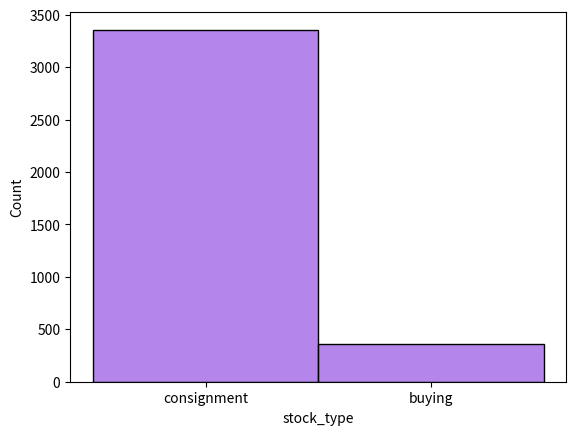

In [732]:
sns.histplot(df3, x = 'stock_type')

In [733]:
result.groupby('stock_type')['sales'].sum()

stock_type
buying          450821.890
consignment    5098738.744
Name: sales, dtype: float64

In [734]:
result.query("stock_type == 'buying'").groupby(["product_name"]).count().head(60)

,invoice,product_code,quantity,date,unit_price,customer_id,sales,stock_type
product_name,,,,,,,,
12 RED ROSE PEG PLACE SETTINGS,66,66,66,66,66,66,66,66
18PC WOODEN CUTLERY SET DISPOSABLE,17,17,17,17,17,17,17,17
200 BENDY SKULL STRAWS,31,31,31,31,31,31,31,31
3 GARDENIA MORRIS BOXED CANDLES,28,28,28,28,28,28,28,28
3 RAFFIA RIBBONS 50'S CHRISTMAS,57,57,57,57,57,57,57,57
3 TRADITIONAl BISCUIT CUTTERS SET,154,154,154,154,154,154,154,154
36 DOILIES DOLLY GIRL,57,57,57,57,57,57,57,57
36 DOILIES VINTAGE CHRISTMAS,130,130,130,130,130,130,130,130
3D DOG PICTURE PLAYING CARDS,38,38,38,38,38,38,38,38


In [735]:
result.query("product_name == 'BIRD DECORATION GREEN POLKADOT'").groupby(["stock_type"]).count()

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
stock_type,,,,,,,,
buying,32,32,32,32,32,32,32,32


In [736]:
result2 = pd.merge(df1,df2,on=['customer_id'])

- 위탁만 가져와서 배송기간 확인

In [737]:
result_consign = result.query('stock_type=="consignment"')

In [738]:
result_consign.sort_values(by=['customer_id','product_name','date']).head(60)

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,stock_type
200937,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2021-01-18,1.04,E12346,77183.60,consignment
200938,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2021-01-18,1.04,E12346,-77183.60,consignment
30292,563949,48173C,DOORMAT BLACK FLOCK,2,2021-08-22,7.95,E12747,15.90,consignment
118458,545321,48194,DOORMAT HEARTS,2,2021-03-01,7.95,E12747,15.90,consignment
77286,569397,48138,DOORMAT UNION FLAG,2,2021-10-04,8.25,E12747,16.50,consignment
85742,554549,22424,ENAMEL BREAD BIN CREAM,1,2021-05-25,12.75,E12747,12.75,consignment
85765,558265,22424,ENAMEL BREAD BIN CREAM,1,2021-06-28,12.75,E12747,12.75,consignment
135588,554549,22425,ENAMEL COLANDER CREAM,3,2021-05-25,4.95,E12747,14.85,consignment
10844,554549,22427,ENAMEL FLOWER JUG CREAM,3,2021-05-25,5.95,E12747,17.85,consignment
123342,554549,22429,ENAMEL MEASURING JUG CREAM,4,2021-05-25,4.25,E12747,17.00,consignment


In [739]:
one_two = pd.merge(df1,df2, on=['customer_id'])
result_all = pd.merge(one_two,df3,on=['product_name'])

In [740]:
r_a_c = result_all.query('stock_type=="consignment"')

In [741]:
r_a_c.reset_index()

,index,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type
0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,Honolulu,HI,339,156,small,sightseeing,other,consignment
1,1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,20.80,Honolulu,HI,339,156,small,sightseeing,other,consignment
2,2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,1.95,New York,NY,8177,778,big,metro,east,consignment
3,3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,1.95,New York,NY,8177,778,big,metro,east,consignment
4,4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,4.16,New York,NY,8177,778,big,metro,east,consignment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258147,282636,580691,90214Z,"LETTER ""Z"" BLING KEY RING",12,2021-12-05,0.29,E13790,3.48,New York,NY,8177,778,big,metro,east,consignment
258148,282637,580865,90083,CRYSTAL CZECH CROSS PHONE CHARM,12,2021-12-06,0.19,E17914,2.28,New York,NY,8177,778,big,metro,east,consignment
258149,282639,581134,23442,12 HANGING EGGS HAND PAINTED,1,2021-12-07,2.08,E16368,2.08,Philadelphia,PA,1585,348,middle,other,east,consignment
258150,282640,581134,23442,12 HANGING EGGS HAND PAINTED,8,2021-12-07,2.08,E16368,16.64,Philadelphia,PA,1585,348,middle,other,east,consignment


In [742]:
r_a_c['date'] = pd.to_datetime(r_a_c['date'])

In [744]:
test = r_a_c.head(100)
test

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,Honolulu,HI,339,156,small,sightseeing,other,consignment
1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,20.80,Honolulu,HI,339,156,small,sightseeing,other,consignment
2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,1.95,New York,NY,8177,778,big,metro,east,consignment
3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,1.95,New York,NY,8177,778,big,metro,east,consignment
4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,4.16,New York,NY,8177,778,big,metro,east,consignment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,548497,22386,JUMBO BAG PINK POLKADOT,10,2021-03-31,2.08,E13089,20.80,Los Angeles,CA,3985,1216,middle,metro,west,consignment
96,560892,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13089,20.80,Los Angeles,CA,3985,1216,middle,metro,west,consignment
97,541565,22386,JUMBO BAG PINK POLKADOT,6,2021-01-19,1.95,E14527,11.70,Dallas,TX,1348,879,middle,other,south,consignment
98,548461,22386,JUMBO BAG PINK POLKADOT,2,2021-03-31,2.08,E14527,4.16,Dallas,TX,1348,879,middle,other,south,consignment


In [745]:
# # plt.title("디스케일링 횟수")
# # df_3.plot.pie(y = "ROLLING_DESCALING", autopct="%.1f%%", colors=['red','green']);

# sns.histplot(data = result_all, x='pop_size',hue = 'stock_type' )

In [746]:
# result_all = result_all.sort_values(by=['customer_id'])
# test = pd.DataFrame(result_all.groupby("customer_id")['quantity'].sum())
# test

- 배송기간 구하기

In [747]:
cosign =result_all.query('stock_type=="consignment"')
buying =result_all.query('stock_type=="buying"')

buy_c=cosign[cosign['quantity']>0]
refund_c=cosign[cosign['quantity']<0]

buy_b=buying[buying['quantity']>0]
refund_b=buying[buying['quantity']<0]


In [748]:
refund2_b= refund_b.groupby(['customer_id','product_code','date'])['quantity'].sum()
refund3_b=refund2_b.to_frame()
refund3_b

refund2_c= refund_c.groupby(['customer_id','product_code','date'])['quantity'].sum()
refund3_c=refund2_c.to_frame()
refund3_c

quantity
customer_id product_code date                
E12346      23166        2021-01-18    -74215
E12748      21135        2021-03-18        -4
            21224        2021-03-18        -6
            21830        2021-05-06       -24
            22045        2021-03-18       -25
...                                       ...
E18272      22204        2021-05-11        -1
            22969        2021-05-11        -2
            84817        2021-05-11        -2
E18277      22423        2021-01-25        -1
E18282      23187        2021-08-09        -5

[5316 rows x 1 columns]

In [749]:
buy2_c= buy_c.groupby(['customer_id','product_code','date'])['quantity'].sum()
buy3_c=buy2_c.to_frame()
buy3_c

buy2_b= buy_b.groupby(['customer_id','product_code','date'])['quantity'].sum()
buy3_b=buy2_b.to_frame()
buy3_b

quantity
customer_id product_code date                
E12747      22469        2021-05-25        12
            84879        2021-03-01        16
                         2021-05-05        16
                         2021-05-25        16
                         2021-10-04        16
...                                       ...
E18287      21556        2021-05-22        12
            22754        2021-05-22        12
            22757        2021-05-22        12
            84507C       2021-05-22         6
            85039B       2021-05-22        72

[23615 rows x 1 columns]

In [750]:
refund4_c=pd.merge(refund3_c, refund_c, how='left', on= ('product_code','customer_id','date'))
refund4_c=refund4_c[['customer_id','product_code','date','quantity_x']]

refund5_c=refund4_c.drop_duplicates()
refund5_c

refund4_b=pd.merge(refund3_b, refund_b, how='left', on= ('product_code','customer_id','date'))
refund4_b=refund4_b[['customer_id','product_code','date','quantity_x']]

refund5_b=refund4_b.drop_duplicates()
refund5_b

,customer_id,product_code,date,quantity_x
0,E12748,22948,2021-03-18,-6
1,E12748,84879,2021-03-18,-5
2,E12749,21843,2021-05-23,-1
3,E12749,22637,2021-05-23,-2
4,E12749,23243,2021-08-11,-1
...,...,...,...,...
453,E18225,22804,2021-08-31,-1
454,E18225,84818,2021-05-27,-6
455,E18231,22149,2021-02-25,-1
456,E18232,22149,2021-06-03,-1


In [751]:
buy4_c=pd.merge(buy3_c, refund_c, how='left', on= ('product_code','customer_id','date'))
buy4_c=buy4_c[['customer_id','product_code','date','quantity_x']]

buy5_c=buy4_c.drop_duplicates()
buy5_c


buy4_b=pd.merge(buy3_b, refund_b, how='left', on= ('product_code','customer_id','date'))
buy4_b=buy4_b[['customer_id','product_code','date','quantity_x']]

buy5_b=buy4_b.drop_duplicates()
buy5_b

,customer_id,product_code,date,quantity_x
0,E12747,22469,2021-05-25,12
1,E12747,84879,2021-03-01,16
2,E12747,84879,2021-05-05,16
3,E12747,84879,2021-05-25,16
4,E12747,84879,2021-10-04,16
...,...,...,...,...
23613,E18287,21556,2021-05-22,12
23614,E18287,22754,2021-05-22,12
23615,E18287,22757,2021-05-22,12
23616,E18287,84507C,2021-05-22,6


In [752]:
delivery_period_c = pd.merge(buy5_c, refund5_c, how='left', on= ('product_code','customer_id'))
delivery_period_c

delivery_period_b = pd.merge(buy5_b, refund5_b, how='left', on= ('product_code','customer_id'))
delivery_period_b

,customer_id,product_code,date_x,quantity_x_x,date_y,quantity_x_y
0,E12747,22469,2021-05-25,12,NaN,NaN
1,E12747,84879,2021-03-01,16,NaN,NaN
2,E12747,84879,2021-05-05,16,NaN,NaN
3,E12747,84879,2021-05-25,16,NaN,NaN
4,E12747,84879,2021-10-04,16,NaN,NaN
...,...,...,...,...,...,...
23740,E18287,21556,2021-05-22,12,NaN,NaN
23741,E18287,22754,2021-05-22,12,NaN,NaN
23742,E18287,22757,2021-05-22,12,NaN,NaN
23743,E18287,84507C,2021-05-22,6,NaN,NaN


In [753]:
df2_c=delivery_period_c[['customer_id','product_code','quantity_x_x','date_x','quantity_x_y','date_y']]
df3_c=df2_c[df2_c['date_x'] <= df2_c['date_y']]

df3_c.head(60)

df2_b=delivery_period_b[['customer_id','product_code','quantity_x_x','date_x','quantity_x_y','date_y']]
df3_b=df2_b[df2_b['date_x'] <= df2_b['date_y']]

df3_b.head(60)

,customer_id,product_code,quantity_x_x,date_x,quantity_x_y,date_y
141,E12748,22948,6,2021-03-18,-6.0,2021-03-18
192,E12748,84879,5,2021-03-18,-5.0,2021-03-18
206,E12749,21843,2,2021-05-10,-1.0,2021-05-23
211,E12749,22637,4,2021-05-10,-2.0,2021-05-23
217,E12749,23243,4,2021-08-01,-1.0,2021-08-11
326,E12841,23004,4,2021-04-14,-2.0,2021-10-05
329,E12841,23307,24,2021-07-17,-22.0,2021-10-05
334,E12843,21900,6,2021-05-10,-4.0,2021-06-15
352,E12853,22725,8,2021-07-28,-8.0,2021-08-24
359,E12854,22189,3,2021-01-25,-1.0,2021-01-25


In [754]:
df4_c = df3_c.drop_duplicates(['customer_id','product_code','date_y'],keep='first')
df4_c.head(60)

df4_b = df3_b.drop_duplicates(['customer_id','product_code','date_y'],keep='first')
df4_b.head(60)

,customer_id,product_code,quantity_x_x,date_x,quantity_x_y,date_y
141,E12748,22948,6,2021-03-18,-6.0,2021-03-18
192,E12748,84879,5,2021-03-18,-5.0,2021-03-18
206,E12749,21843,2,2021-05-10,-1.0,2021-05-23
211,E12749,22637,4,2021-05-10,-2.0,2021-05-23
217,E12749,23243,4,2021-08-01,-1.0,2021-08-11
326,E12841,23004,4,2021-04-14,-2.0,2021-10-05
329,E12841,23307,24,2021-07-17,-22.0,2021-10-05
334,E12843,21900,6,2021-05-10,-4.0,2021-06-15
352,E12853,22725,8,2021-07-28,-8.0,2021-08-24
359,E12854,22189,3,2021-01-25,-1.0,2021-01-25


In [755]:
df4_c.columns=['customer_id','product_code','구매수량','구매일','취소수량','취소일']
df4_c

df4_b.columns=['customer_id','product_code','구매수량','구매일','취소수량','취소일']
df4_b

,customer_id,product_code,구매수량,구매일,취소수량,취소일
141,E12748,22948,6,2021-03-18,-6.0,2021-03-18
192,E12748,84879,5,2021-03-18,-5.0,2021-03-18
206,E12749,21843,2,2021-05-10,-1.0,2021-05-23
211,E12749,22637,4,2021-05-10,-2.0,2021-05-23
217,E12749,23243,4,2021-08-01,-1.0,2021-08-11
...,...,...,...,...,...,...
23550,E18225,22804,6,2021-02-07,-1.0,2021-08-31
23555,E18225,84818,6,2021-05-19,-6.0,2021-05-27
23582,E18231,22149,24,2021-02-24,-1.0,2021-02-25
23595,E18232,22149,6,2021-05-31,-1.0,2021-06-03


In [756]:
df4_b['구매일']=pd.to_datetime(df4_b['구매일'])
df4_b['취소일']=pd.to_datetime(df4_b['취소일'])

df4_c['구매일']=pd.to_datetime(df4_c['구매일'])
df4_c['취소일']=pd.to_datetime(df4_c['취소일'])

In [757]:
df4_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 141 to 23665
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   380 non-null    object        
 1   product_code  380 non-null    object        
 2   구매수량          380 non-null    int64         
 3   구매일           380 non-null    datetime64[ns]
 4   취소수량          380 non-null    float64       
 5   취소일           380 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 20.8+ KB


In [758]:
df4_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4293 entries, 0 to 250961
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   4293 non-null   object        
 1   product_code  4293 non-null   object        
 2   구매수량          4293 non-null   int64         
 3   구매일           4293 non-null   datetime64[ns]
 4   취소수량          4293 non-null   float64       
 5   취소일           4293 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 234.8+ KB


In [759]:
df4_c['배송기간']=df4_c['구매일']-df4_c['취소일']
df4_c

df4_b['배송기간']=df4_b['구매일']-df4_b['취소일']
df4_b

,customer_id,product_code,구매수량,구매일,취소수량,취소일,배송기간
141,E12748,22948,6,2021-03-18,-6.0,2021-03-18,0 days
192,E12748,84879,5,2021-03-18,-5.0,2021-03-18,0 days
206,E12749,21843,2,2021-05-10,-1.0,2021-05-23,-13 days
211,E12749,22637,4,2021-05-10,-2.0,2021-05-23,-13 days
217,E12749,23243,4,2021-08-01,-1.0,2021-08-11,-10 days
...,...,...,...,...,...,...,...
23550,E18225,22804,6,2021-02-07,-1.0,2021-08-31,-205 days
23555,E18225,84818,6,2021-05-19,-6.0,2021-05-27,-8 days
23582,E18231,22149,24,2021-02-24,-1.0,2021-02-25,-1 days
23595,E18232,22149,6,2021-05-31,-1.0,2021-06-03,-3 days


In [760]:
df4_c['배송기간']=df4_c['배송기간'].dt.days
df4_b['배송기간']=df4_b['배송기간'].dt.days

In [761]:
df4_c['배송기간'].mean()

-59.98695550896809

In [762]:
df4_b['배송기간'].mean()

-51.69736842105263

In [763]:
df4_b[['배송기간']]
df4_b.reset_index(drop = True, inplace = True)
df4_b

,customer_id,product_code,구매수량,구매일,취소수량,취소일,배송기간
0,E12748,22948,6,2021-03-18,-6.0,2021-03-18,0
1,E12748,84879,5,2021-03-18,-5.0,2021-03-18,0
2,E12749,21843,2,2021-05-10,-1.0,2021-05-23,-13
3,E12749,22637,4,2021-05-10,-2.0,2021-05-23,-13
4,E12749,23243,4,2021-08-01,-1.0,2021-08-11,-10
...,...,...,...,...,...,...,...
375,E18225,22804,6,2021-02-07,-1.0,2021-08-31,-205
376,E18225,84818,6,2021-05-19,-6.0,2021-05-27,-8
377,E18231,22149,24,2021-02-24,-1.0,2021-02-25,-1
378,E18232,22149,6,2021-05-31,-1.0,2021-06-03,-3


In [764]:
df4_c.reset_index(drop = True, inplace = True)
df4_c

,customer_id,product_code,구매수량,구매일,취소수량,취소일,배송기간
0,E12346,23166,74215,2021-01-18,-74215.0,2021-01-18,0
1,E12748,21135,4,2021-03-18,-4.0,2021-03-18,0
2,E12748,21224,6,2021-03-18,-6.0,2021-03-18,0
3,E12748,21830,24,2021-05-06,-24.0,2021-05-06,0
4,E12748,22045,25,2021-03-18,-25.0,2021-03-18,0
...,...,...,...,...,...,...,...
4288,E18272,20932,4,2021-04-28,-1.0,2021-05-11,-13
4289,E18272,22204,4,2021-04-28,-1.0,2021-05-11,-13
4290,E18272,22969,24,2021-04-07,-2.0,2021-05-11,-34
4291,E18272,84817,6,2021-04-28,-2.0,2021-05-11,-13


In [765]:
from scipy import stats

statistic, p1 = stats.shapiro(df4_b['배송기간'])
print('Shapiro-wilk Test : statistic = {}, p-value = {}'.format(statistic, p1))


# statistic, p1 = stats.shapiro(df.loc[df['SCALE']==0, 'PT_LENGTH'])
# print('Shapiro-wilk Test : statistic = {}, p-value = {}'.format(statistic, p1))

Shapiro-wilk Test : statistic = 0.7255653142929077, p-value = 1.5381638873116502e-24


In [766]:
shapiro_test = stats.shapiro(df4_c['배송기간'])
shapiro_test

ShapiroResult(statistic=0.7818523645401001, pvalue=0.0)

In [767]:
from scipy.stats import mannwhitneyu

print(mannwhitneyu(df4_c['배송기간'], df4_b['배송기간']))

MannwhitneyuResult(statistic=745338.5, pvalue=0.005253992248788869)


In [915]:
df_drop = pd.read_csv("분석기초/이상치제거.csv")

In [916]:
df_drop['date'] = pd.to_datetime(df_drop['date'])
df_drop['quarter'] = df_drop['date'].apply(lambda x : x.quarter)
df_drop = df_drop.query('quantity > 0')

In [917]:
# df_drop.groupby(['quarter','customer_id'],as_index=False).count().groupby('quarter')['invoice'].count()

In [918]:
# df_pivot = df_drop.pivot(index="quarter", columns="city", values='')

In [919]:
df_drop.head()

,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,quarter
0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,Honolulu,HI,339,156,small,sightseeing,other,consignment,0,1
1,1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,20.80,Honolulu,HI,339,156,small,sightseeing,other,consignment,0,3
2,2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,1.95,New York,NY,8177,778,big,metro,east,consignment,0,1
3,3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,1.95,New York,NY,8177,778,big,metro,east,consignment,0,1
4,4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,4.16,New York,NY,8177,778,big,metro,east,consignment,0,2


In [920]:
df_drop = df_drop.groupby(df_drop['product_name']).sum().sort_values(by='quantity', ascending=False)
df_drop= df_drop.reset_index()
df_drop = df_drop.head()
df_drop

,product_name,Unnamed: 0,quantity,unit_price,sales,pop_thousand,land_sq_meter,QuantityCanceled,quarter
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,9303641,37302,99.12,9416.02,1395275,291374,1200,914
1,JUMBO BAG RED RETROSPOT,3026550,35264,2526.99,65149.51,4541479,1128042,562,3188
2,ASSORTED COLOUR BIRD ORNAMENT,27960892,33350,1893.10,52594.46,4637810,1025218,40,2865
3,WHITE HANGING HEART T-LIGHT HOLDER,9064592,31102,4681.79,85042.22,6397005,1470476,2038,3816
4,POPCORN HOLDER,58407997,23253,344.09,17417.25,1508759,365124,129,1365


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'),
  Text(1, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(2, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(3, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(4, 0, 'POPCORN HOLDER')])

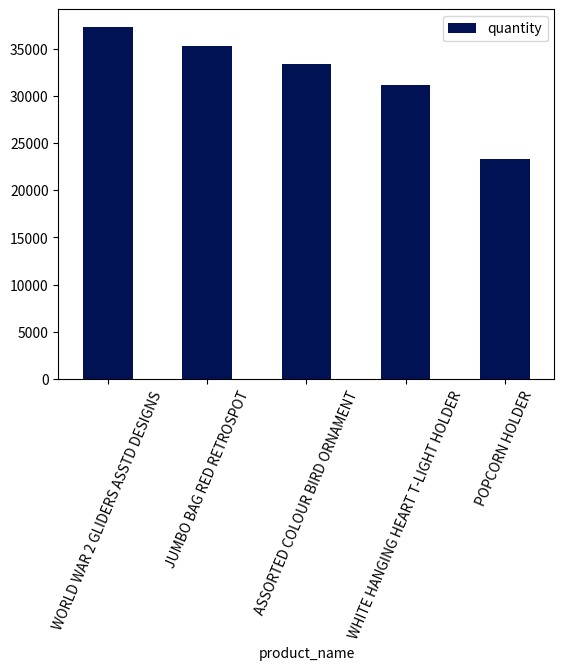

In [932]:
df_drop.plot.bar(x='product_name', y='quantity', color="#001253")
plt.xticks(rotation=67)

In [4]:
df_eon = pd.read_csv("분석기초/df_cleaned.csv")

In [5]:
df_eon = df_eon.groupby(df_eon['pop_size']).sum().sort_values(by='real_sales', ascending=False)
df_eon= df_eon.reset_index()
df_eon = df_eon.head()
df_eon

,pop_size,Unnamed: 0,invoice,quantity,unit_price,sales,pop_thousand,land_sq_meter,QuantityCanceled,real_quantity,real_sales
0,middle,25838891223,103454961770,2333326,535310.522,3882970.322,427882141,187453803,110199,2223127,3683389.562
1,big,11144048559,44408634246,1033653,244567.492,1861746.802,641976270,61080780,97938,935715,1650802.242
2,small,2159000420,9142440448,164871,47836.850,284648.230,8813793,3671526,2875,161996,281166.780


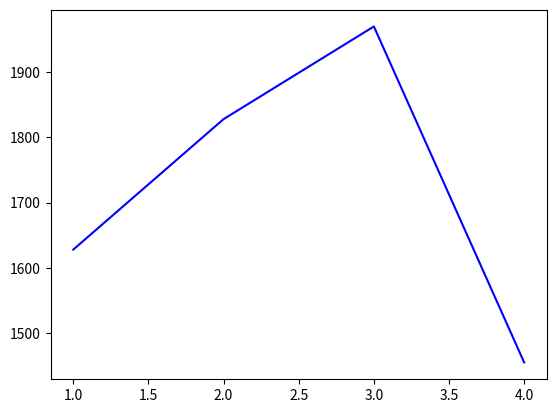

In [7]:
a = [1,2,3,4]
b = [1628,1828,1970,1455]
plt.plot(a,b)
plt.show()

In [47]:
test = pd.read_csv("분석기초/jinsolgod.csv")

In [31]:
test.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'invoice', 'product_code', 'product_name',
       'quantity', 'date', 'unit_price', 'customer_id', 'sales', 'city',
       'state', 'pop_thousand', 'land_sq_meter', 'pop_size', 'city_type',
       'city_lctn', 'stock_type', 'QuantityCanceled', 'real_quantity',
       'real_sales', 'margin'],
      dtype='object')

In [32]:
test['customer_id']

0         E13313
1         E13313
2         E17315
3         E17315
4         E17315
           ...  
276782    E17914
276783    E17290
276784    E16368
276785    E16368
276786    E16368
Name: customer_id, Length: 276787, dtype: object

In [15]:
test['date'] = pd.to_datetime(test['date'])
test['month'] = test['date'].apply(lambda x : x.month)
test

test = test.query('month==10').sort_values(by='margin', ascending=False).head()

In [21]:
test.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'invoice', 'product_code', 'product_name',
       'quantity', 'date', 'unit_price', 'customer_id', 'sales', 'city',
       'state', 'pop_thousand', 'land_sq_meter', 'pop_size', 'city_type',
       'city_lctn', 'stock_type', 'QuantityCanceled', 'real_quantity',
       'real_sales', 'margin', 'month'],
      dtype='object')

- 10월달에 마진이 가장 좋은 상위 5개 제품

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(1, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(2, 0, 'FELTCRAFT 6 FLOWER FRIENDS'),
  Text(3, 0, 'Manual'),
  Text(4, 0, 'DOLLY GIRL WALL ART')])

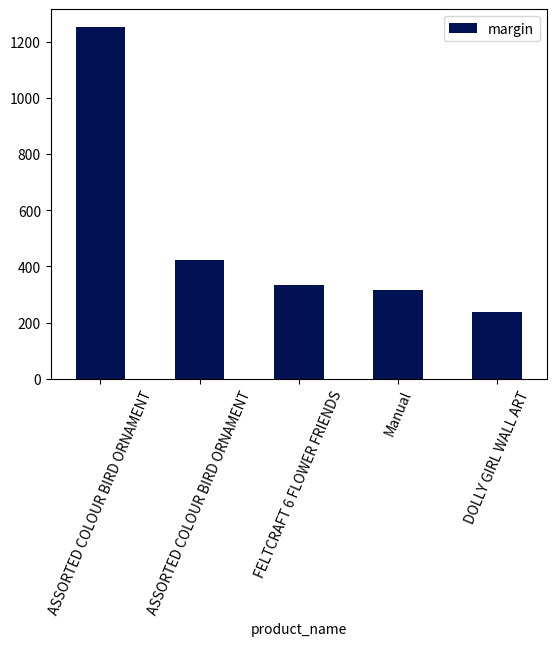

In [17]:
test.plot.bar(x='product_name', y='margin', color="#001253")
plt.xticks(rotation=67)

In [61]:
test = pd.read_csv("분석기초/jinsolgod.csv")

In [62]:
test = test.groupby(test['customer_id']).sum().sort_values(by=['real_quantity','margin'], ascending=False)
test= test.reset_index()
test

,customer_id,Unnamed: 0.1,Unnamed: 0,invoice,quantity,unit_price,sales,pop_thousand,land_sq_meter,QuantityCanceled,real_quantity,real_sales,margin
0,E17450,37942710,38776360,151482714,61728,890.74,169626.36,388688,229568,186,61542,168685.20,21559.412
1,E18102,57621418,58872789,218735416,52507,1612.08,201842.79,3164499,301086,0,52507,201842.79,23375.947
2,E17511,109776333,112164895,453362739,53102,1919.49,78495.01,3227850,984960,1350,51752,76016.38,8451.126
3,E13694,69205439,70704733,252572332,50740,695.43,51761.18,1057875,754390,1328,49412,49800.70,5500.364
4,E12931,21440039,21910099,91912072,52724,256.12,78448.52,1226550,116700,4133,48591,70249.87,10337.627
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,E15802,66620,68298,560651,1,451.42,451.42,1429,844,1,0,0.00,0.000
3412,E16163,59813,61083,550934,100,4.15,415.00,2325,1658,100,0,0.00,0.000
3413,E17190,138223,141336,553380,1,195.00,195.00,8177,778,1,0,0.00,0.000
3414,E17548,645127,659532,2753775,58,12.15,103.30,6740,4395,58,0,0.00,0.000


In [63]:
a = test.tail(60)

In [64]:
b =test.head(60)

In [65]:
shapiro_test = stats.shapiro(a['margin'])
shapiro_test

ShapiroResult(statistic=0.3667335510253906, pvalue=1.1960053546220938e-14)

In [66]:
shapiro_test = stats.shapiro(b['margin'])
shapiro_test

ShapiroResult(statistic=0.5834627747535706, pvalue=8.802398913931864e-12)

In [67]:
print(mannwhitneyu(a['margin'], b['margin']))

MannwhitneyuResult(statistic=2.0, pvalue=3.7972024111133106e-21)


In [90]:
test = pd.read_csv("분석기초/jinsolgod.csv")
test = test.query("stock_type =='buying'")
test= test.reset_index()
test = test.groupby(test['product_name']).sum().sort_values(by='real_quantity', ascending=False)
test = test.head()
test

,index,Unnamed: 0.1,Unnamed: 0,invoice,quantity,unit_price,sales,pop_thousand,land_sq_meter,QuantityCanceled,real_quantity,real_sales,margin
product_name,,,,,,,,,,,,,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,9125460,9125460,9303641,195347979,37302,99.12,9416.02,1395275,291374,1200,36102,9144.82,2743.446
ASSORTED COLOUR BIRD ORNAMENT,27397269,27397269,27960892,640888581,33350,1893.10,52594.46,4637810,1025218,40,33310,52528.54,15758.562
COLOUR GLASS T-LIGHT HOLDER HANGING,4890808,4890808,4971769,279453492,14103,319.78,8619.55,1786529,480955,64,14039,8577.95,2573.385
HEART OF WICKER SMALL,137610682,137610682,140593923,422847523,13625,1223.36,22887.64,2873517,666183,35,13590,22833.49,6850.047
AGED GLASS SILVER T-LIGHT HOLDER,19227375,19227375,19697716,120066092,9150,134.05,5447.10,983313,184200,15,9135,5437.35,1631.205


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'),
  Text(1, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(2, 0, 'COLOUR GLASS T-LIGHT HOLDER HANGING'),
  Text(3, 0, 'HEART OF WICKER SMALL'),
  Text(4, 0, 'AGED GLASS SILVER T-LIGHT HOLDER')])

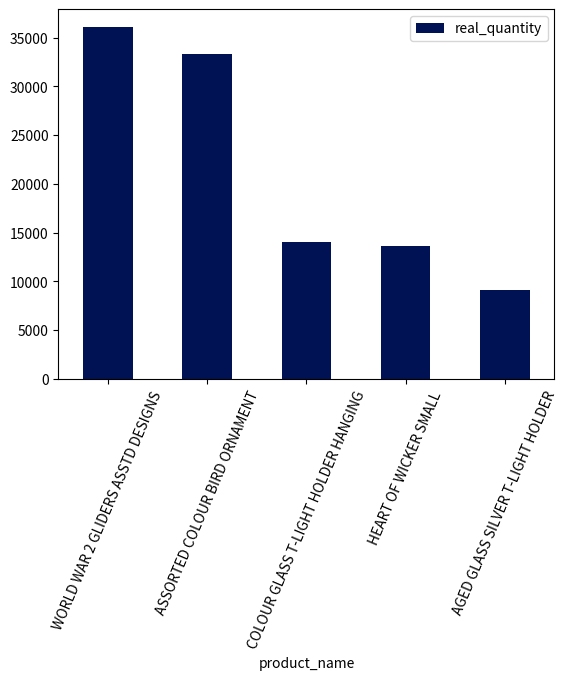

In [75]:
test.plot.bar(x='product_name', y='real_quantity', color="#001253")

plt.xticks(rotation=67)

- 나눔

In [83]:
test = pd.read_csv("분석기초/jinsolgod.csv")


In [84]:
test = test.sort_values(by=['real_quantity','margin'], ascending=False)
corr, pval = stats.pearsonr(test['real_quantity'], test['margin'])
print('corr : {0:0.3f}'.format(corr))
print('p-value : {0:0.3f}'.format(pval))

corr : 0.610
p-value : 0.000


- 나눔

In [86]:
test = pd.read_csv("분석기초/jinsolgod.csv")
test['city'].unique()

array(['Honolulu', 'New York', 'San Diego', 'Dallas', 'Houston',
       'Los Angeles', 'Las Vegas', 'Phoenix', 'Chicago', 'Philadelphia',
       'Miami', 'San Antonio', 'San Jose'], dtype=object)

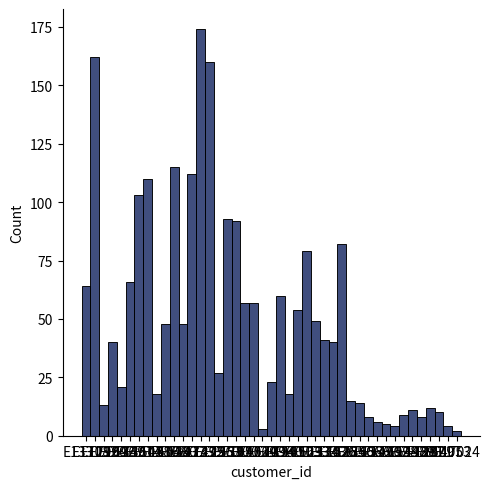

In [88]:
sns.displot(test[test.city=="Honolulu"]["customer_id"], color="#001253")

- 고객데이터에 1년간 구매 횟수 열 추가한 다음 도시별로 구분해서 카이제곱 검정

In [80]:
test = pd.read_csv("분석기초/jinsolgod.csv")

In [76]:
A = []
for i in test['real_quantity']:
    if i > 0:
        A.append(1)
    if i <= 0:
        A.append(0)
test['is_null'] = A

In [77]:
test['is_null'].unique()

array([1, 0])

In [79]:
test

,Unnamed: 0.1,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,...,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,real_quantity,real_sales,margin,is_null
0,0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,...,156,small,sightseeing,other,consignment,0,10,19.50,1.950,1
1,1,1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,20.80,...,156,small,sightseeing,other,consignment,0,10,20.80,2.080,1
2,2,2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,1.95,...,778,big,metro,east,consignment,0,1,1.95,0.195,1
3,3,3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,1.95,...,778,big,metro,east,consignment,0,1,1.95,0.195,1
4,4,4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,4.16,...,778,big,metro,east,consignment,0,2,4.16,0.416,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276782,276782,282637,580865,90083,CRYSTAL CZECH CROSS PHONE CHARM,12,2021-12-06,0.19,E17914,2.28,...,778,big,metro,east,consignment,0,12,2.28,0.228,1
276783,276783,282638,580893,79157B,UBO-LIGHT TRIOBASE BLUE,1,2021-12-06,0.85,E17290,0.85,...,1216,middle,metro,west,buying,0,1,0.85,0.255,1
276784,276784,282639,581134,23442,12 HANGING EGGS HAND PAINTED,1,2021-12-07,2.08,E16368,2.08,...,348,middle,other,east,consignment,0,1,2.08,0.208,1
276785,276785,282640,581134,23442,12 HANGING EGGS HAND PAINTED,8,2021-12-07,2.08,E16368,16.64,...,348,middle,other,east,consignment,0,8,16.64,1.664,1


In [82]:
test[test['product_name'] == 'WORLD WAR 2 GLIDERS ASSTD DESIGNS']

,Unnamed: 0.1,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,...,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,real_quantity,real_sales,margin
26356,26356,26872,553685,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,96,2021-05-18,0.29,E18097,27.84,...,2325,1658,middle,other,south,buying,0,96,27.84,8.352
26357,26357,26873,540114,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,96,2021-01-05,0.29,E15498,27.84,...,8177,778,big,metro,east,buying,0,96,27.84,8.352
26358,26358,26874,557964,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2021-06-24,0.29,E15498,13.92,...,8177,778,big,metro,east,buying,0,48,13.92,4.176
26359,26359,26875,581129,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2021-12-07,0.29,E15498,13.92,...,8177,778,big,metro,east,buying,0,48,13.92,4.176
26360,26360,26876,550955,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2021-04-21,0.29,E14189,13.92,...,8177,778,big,metro,east,buying,0,48,13.92,4.176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26695,26695,27216,575152,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2021-11-08,0.29,E16284,13.92,...,8177,778,big,metro,east,buying,0,48,13.92,4.176
26696,26696,27217,580262,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2021-12-02,0.29,E16759,13.92,...,1348,879,middle,other,south,buying,0,48,13.92,4.176
26697,26697,27218,580373,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2021-12-02,0.29,E14788,13.92,...,1598,1291,middle,other,south,buying,0,48,13.92,4.176
26698,26698,27219,680373,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2021-12-21,0.29,E14788,13.92,...,1598,1291,middle,other,south,buying,0,48,13.92,4.176


(0.0, 100.0)

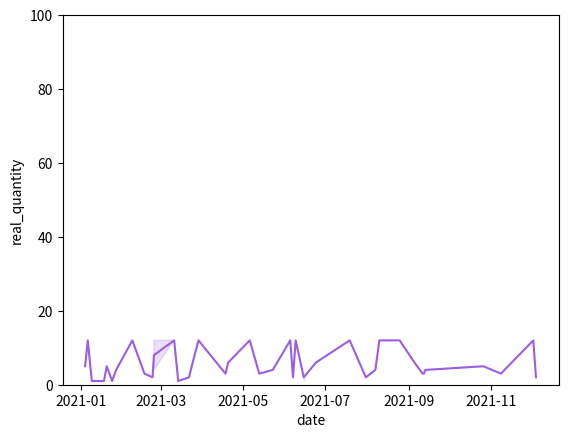

In [147]:
sns.lineplot(data = test[test['product_name'] == 'PARTY INVITES BALLOON GIRL'], x = 'date', y = 'real_quantity')
plt.ylim(0,100)

<AxesSubplot:xlabel='date', ylabel='real_quantity'>

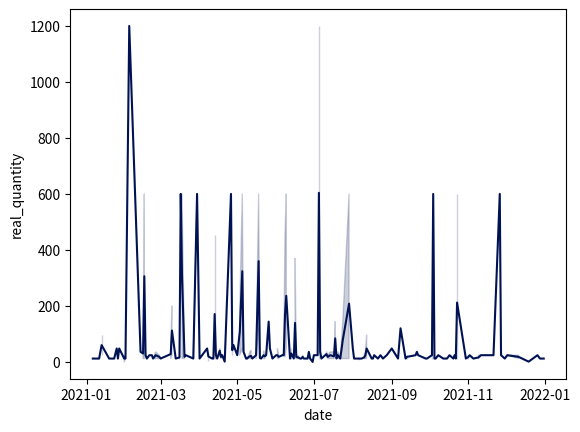

In [154]:
sns.lineplot(data = test[test['product_name'] == 'ASSORTED COLOURS SILK FAN'], x = 'date', y = 'real_quantity', color ="#001253")

In [86]:
pd.to_datetime(test['date'])
test['date'] =pd.to_datetime(test['date'])
test['month']=test['date'].dt.month

<AxesSubplot:xlabel='month', ylabel='real_quantity'>

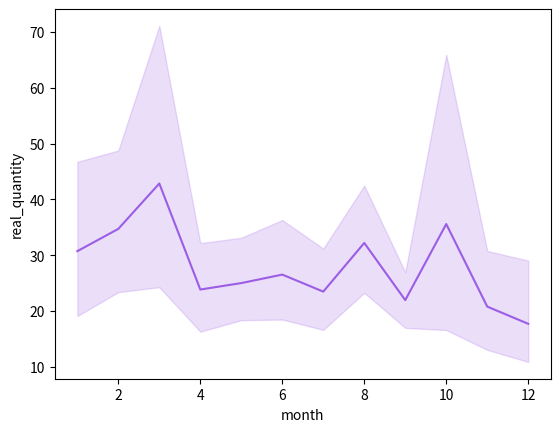

In [87]:
sns.lineplot(data = test[test['product_name'] == 'JUMBO BAG RED RETROSPOT'], x = 'month', y = 'real_quantity')

In [5]:
df = pd.read_csv("분석기초/jinsolgod.csv")

In [8]:
df['date'] =pd.to_datetime(df['date'])
test = df[['date','real_quantity']]
test = test.groupby('date',as_index = False)['real_quantity'].sum().set_index('date')
test

,real_quantity
date,
2021-01-04,6614
2021-01-05,17602
2021-01-06,14804
2021-01-07,11206
2021-01-09,7254
...,...
2021-12-26,3217
2021-12-27,4606
2021-12-28,4348


In [11]:
test.set_index('date',inplcae=True)


TypeError: set_index() got an unexpected keyword argument 'inplcae'

In [263]:
y_train, y_test = (test[:240], test[240:])

In [264]:
import pmdarima as pm
from pmdarima.arima import ndiffs

kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


In [265]:
model = pm.auto_arima(y = y_train        # 데이터
                      , d = 1            # 차분 차수, ndiffs 결과!
                      , start_p = 0 
                      , max_p = 3   
                      , start_q = 0 
                      , max_q = 3   
                      , m = 1       
                      , seasonal = False # 계절성 ARIMA가 아니라면 필수!
                      , stepwise = True
                      , trace=True
                      )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4901.185, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4858.931, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4814.991, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4899.188, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4813.202, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4808.140, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4856.910, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4808.201, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4807.159, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4807.767, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4801.338, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=4802.4

In [266]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -2392.183
Date:                Thu, 17 Nov 2022   AIC                           4798.366
Time:                        10:05:34   BIC                           4822.701
Sample:                             0   HQIC                          4808.172
                                - 240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5149      0.079    -19.154      0.000      -1.670      -1.360
ar.L2         -0.3829      0.137     -2.797      0.005      -0.651      -0.115
ar.L3          0.2525      0.074      3.409      0.0

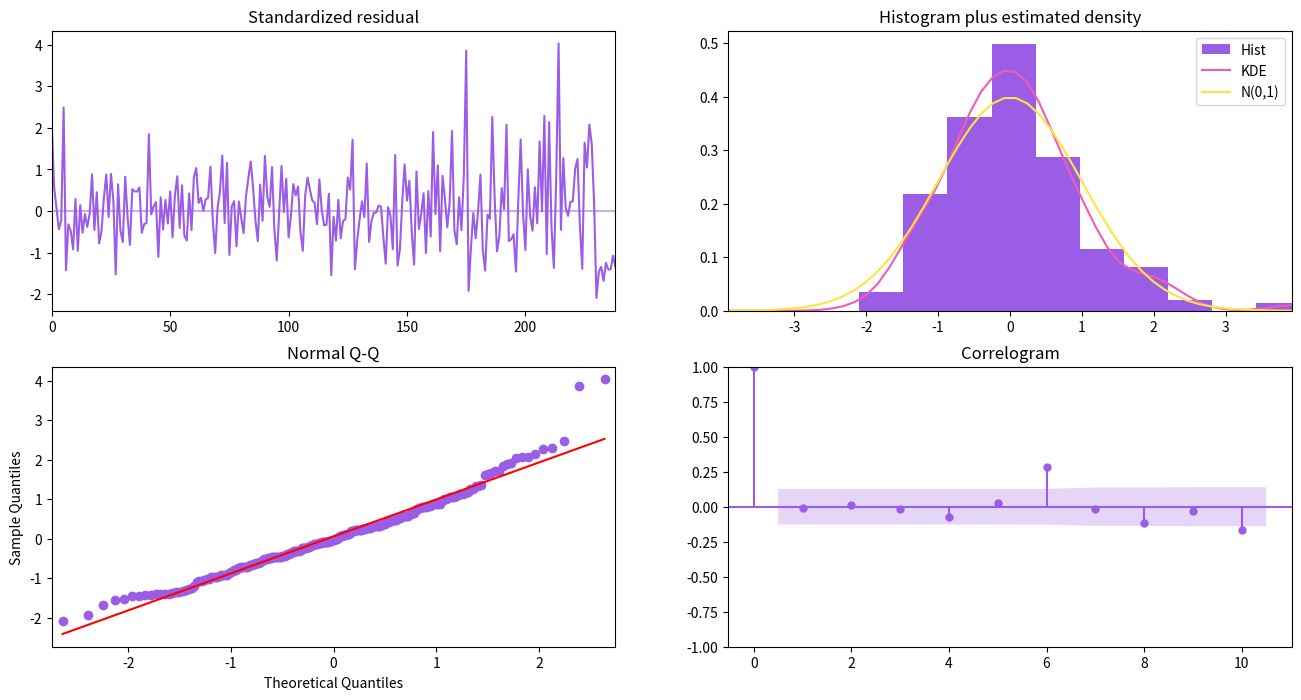

In [267]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

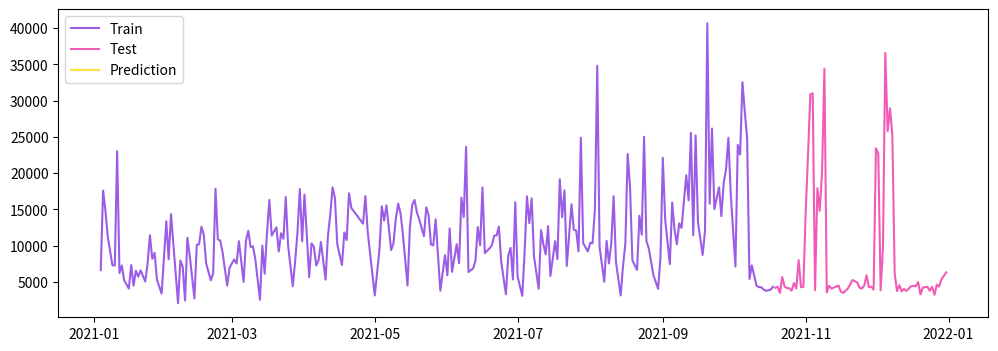

In [268]:
# 테스트 데이터 개수만큼 예측
y_predict = model.predict(n_periods=len(y_test)) 
y_predict = pd.DataFrame(y_predict,index = y_test.index,columns=['Prediction'])

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [269]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [273]:
model

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [270]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

ValueError: could not convert string to float: 'real_quantity'

In [271]:
pd.DataFrame({"test": y_test, "pred": y_pred})

ValueError: Data must be 1-dimensional

In [272]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, y_pred):.3f}")
# MAPE: 0.792

TypeError: unsupported format string passed to Series.__format__

In [193]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.arima_model import ARIMA
# import statsmodels.api as sm


# model2 = sm.tsa.arima.ARIMA(train.real_quantity, order=(0,1,1))
# model2_fit = model2.fit()
# print(model2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          real_quantity   No. Observations:                  240
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2404.601
Date:                Wed, 16 Nov 2022   AIC                           4813.202
Time:                        17:01:54   BIC                           4820.154
Sample:                             0   HQIC                          4816.003
                                - 240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8268      0.039    -21.276      0.000      -0.903      -0.751
sigma2      3.561e+07   3.32e-11   1.07e+18      0.000    3.56e+07    3.56e+07
Ljung-Box (L1) (Q):                   4.20   Jarque-

In [199]:
model

,real_quantity
date,
2021-01-04,6614
2021-01-05,17602
2021-01-06,14804
2021-01-07,11206
2021-01-09,7254
...,...
2021-12-26,3217
2021-12-27,4606
2021-12-28,4348


In [198]:
datasplit_ts(model,'date','real_quantity','2021-07-01')

KeyError: 'date'

In [186]:
model2.score(test.index)

array([2.34885083, 1.16667461, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [215]:
df['product_name'].count()

276787

In [219]:
df = df.drop_duplicates(['product_name'])
df['product_name'].count()

3702

In [220]:
df.head()

,Unnamed: 0.1,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,...,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,real_quantity,real_sales,margin
0,0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,...,339,156,small,sightseeing,other,consignment,0,10,19.5,1.95
734,734,742,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,...,339,156,small,sightseeing,other,consignment,0,25,10.5,1.05
891,891,899,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,...,339,156,small,sightseeing,other,consignment,0,25,10.5,1.05
1141,1141,1149,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,...,339,156,small,sightseeing,other,consignment,0,5,10.5,1.05
1463,1463,1474,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,...,339,156,small,sightseeing,other,consignment,0,10,12.5,1.25


In [221]:
df[df['product_name'].str.contains('CHRISTMAS')].groupby('date')['quantity'].sum()

date
2021-01-04    199
2021-01-06      1
2021-01-17      4
2021-01-26      2
2021-02-10     12
             ... 
2021-12-05     24
2021-12-06      8
2021-12-07     82
2021-12-08      1
2021-12-09      2
Name: quantity, Length: 61, dtype: int64

In [231]:
test = pd.read_csv("분석기초/jinsolgod.csv")
test_chris = test['product_name'].str.contains('CHRISTMAS')

In [232]:
test.head()

,Unnamed: 0.1,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,...,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,real_quantity,real_sales,margin
0,0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,...,339,156,small,sightseeing,other,consignment,0,10,19.50,1.950
1,1,1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,20.80,...,339,156,small,sightseeing,other,consignment,0,10,20.80,2.080
2,2,2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,1.95,...,8177,778,big,metro,east,consignment,0,1,1.95,0.195
3,3,3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,1.95,...,8177,778,big,metro,east,consignment,0,1,1.95,0.195
4,4,4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,4.16,...,8177,778,big,metro,east,consignment,0,2,4.16,0.416


In [ ]:
test['month'] = test['date'].apply(lambda x : x.month)
test= test.reset_index()
test = test.groupby(test['month']).sum().sort_values(by='real_quantity', ascending=False)